# Importing the dataset

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [136]:
car=pd.read_csv('quikr_car samp1.csv')

In [137]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [138]:
car.shape

(8794, 6)

In [112]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8794 entries, 0 to 8793
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        8794 non-null   object
 1   company     8794 non-null   object
 2   year        8794 non-null   object
 3   Price       8794 non-null   object
 4   kms_driven  8740 non-null   object
 5   fuel_type   8741 non-null   object
dtypes: object(6)
memory usage: 412.3+ KB


## Quality

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## Cleaning Data 

#### year has many non-year values

In [139]:
car=car[car['year'].str.isnumeric()]

#### year is in object. Change to integer

In [140]:
car['year']=car['year'].astype(int)

#### Price has Ask for Price

In [141]:
car=car[car['Price']!='Ask For Price']

#### Price has commas in its prices and is in object

In [142]:
car['Price']=car['Price'].str.replace(',','').astype(int)

####  kms_driven has object values with kms at last.

In [143]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [144]:
car.isna().sum()

name          0
company       0
year          0
Price         0
kms_driven    2
fuel_type     1
dtype: int64

In [145]:
car = car.dropna()
car.head(5)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


#### It has nan values and two rows have 'Petrol' in them

In [146]:
car=car[car['kms_driven'].str.isnumeric()]

In [147]:
car['kms_driven']=car['kms_driven'].astype(int)

#### fuel_type has nan values

In [148]:
car=car[~car['fuel_type'].isna()]

In [149]:
car.shape

(8718, 6)

<AxesSubplot:>

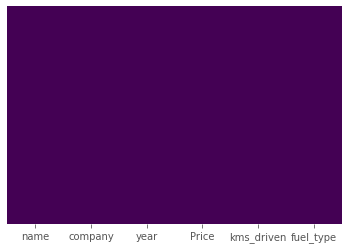

In [150]:
import seaborn as sns
sns.heatmap(car.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### name and company had spammed data...but with the previous cleaning, those rows got removed.

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [151]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data

In [152]:
car=car.reset_index(drop=True)

In [153]:
car.drop_duplicates(inplace=True)

### we have dropped a significant amount of duplicates as well 

## Cleaned Data

In [154]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
8713,Datsun GO,Datsun,2018,295000,15000,Petrol
8714,Volkswagen Vento,Volkswagen,2015,480000,71000,Diesel
8715,Toyota Fortuner,Toyota,2011,1200000,140000,Diesel
8716,Renault Duster,Renault,2015,475000,34000,Diesel


In [26]:
car.to_csv('Cleaned_Car_data.csv')

In [20]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8718 entries, 0 to 8717
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        8718 non-null   object
 1   company     8718 non-null   object
 2   year        8718 non-null   int32 
 3   Price       8718 non-null   int32 
 4   kms_driven  8718 non-null   int32 
 5   fuel_type   8718 non-null   object
dtypes: int32(3), object(3)
memory usage: 306.6+ KB


# Exploratory Data Analysis

In [21]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,8718,8718,8718.000000,8.718000e+03,8718.000000,8718
unique,349,36,NaN,NaN,NaN,5
top,Hyundai i20,Maruti,NaN,NaN,NaN,Diesel
freq,501,2844,NaN,NaN,NaN,4300
mean,NaN,NaN,2015.596123,7.105534e+05,55873.024547,NaN
std,NaN,NaN,3.316901,8.384456e+05,40995.388962,NaN
min,NaN,NaN,1993.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2014.000000,3.500000e+05,30000.000000,NaN
50%,NaN,NaN,2016.000000,5.400000e+05,50000.000000,NaN
75%,NaN,NaN,2018.000000,7.750000e+05,72151.250000,NaN


<AxesSubplot:>

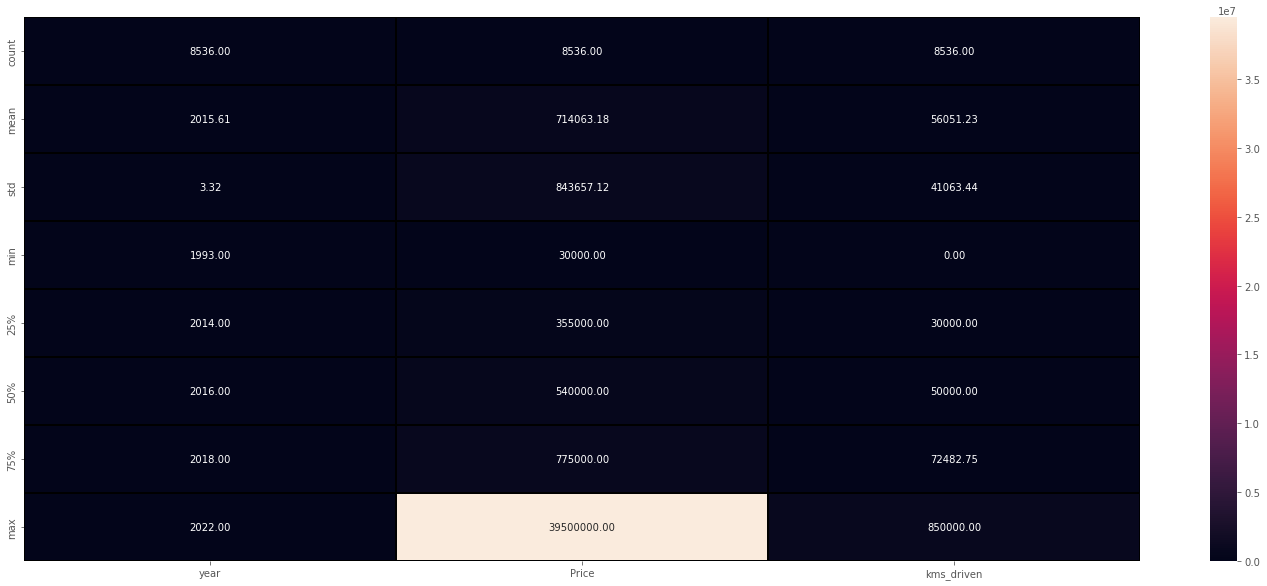

In [32]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
sns.heatmap(car.describe(),annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

In [34]:
# define numerical & categorical columns
numeric_features = [feature for feature in car.columns if car[feature].dtype != 'O']
categorical_features = [feature for feature in car.columns if car[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['year', 'Price', 'kms_driven']

We have 3 categorical features : ['name', 'company', 'fuel_type']


In [155]:
car=car[car['Price']<6000000]

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

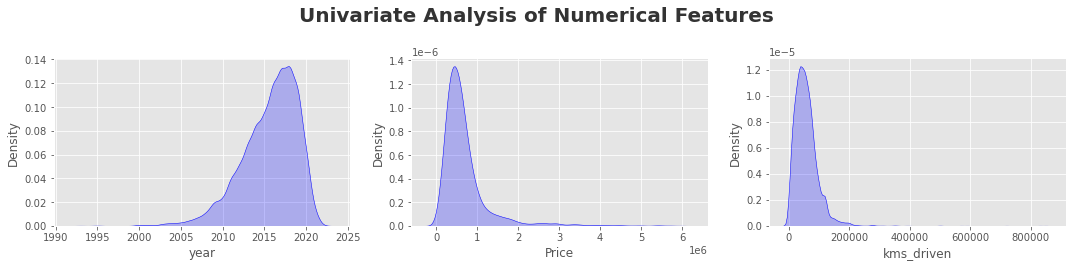

In [36]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=car[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# Categorical Features

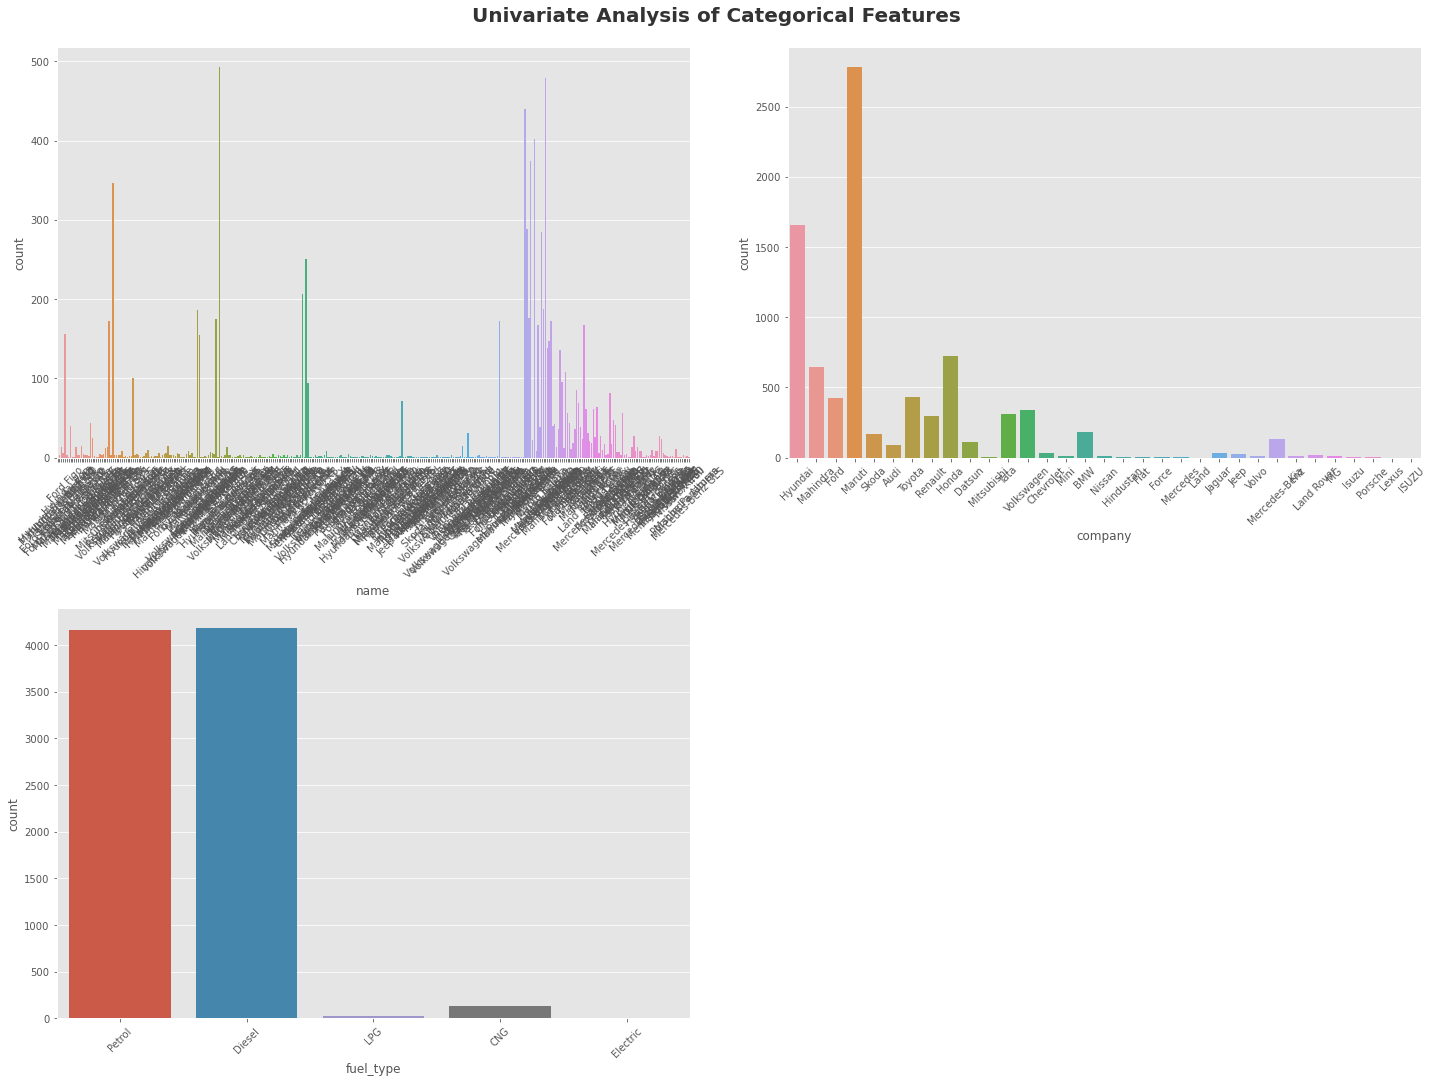

In [37]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'name', 'company', 'fuel_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=car[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Checking relationship of Company with Price

In [30]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo', 'Mercedes-Benz',
       'Kia', 'Land Rover', 'MG', 'Isuzu', 'Porsche', 'Lexus', 'ISUZU'],
      dtype=object)

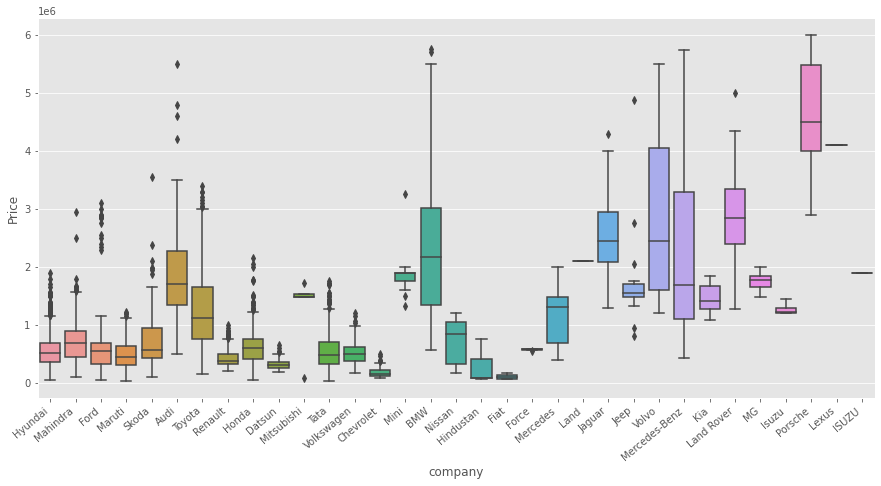

In [32]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

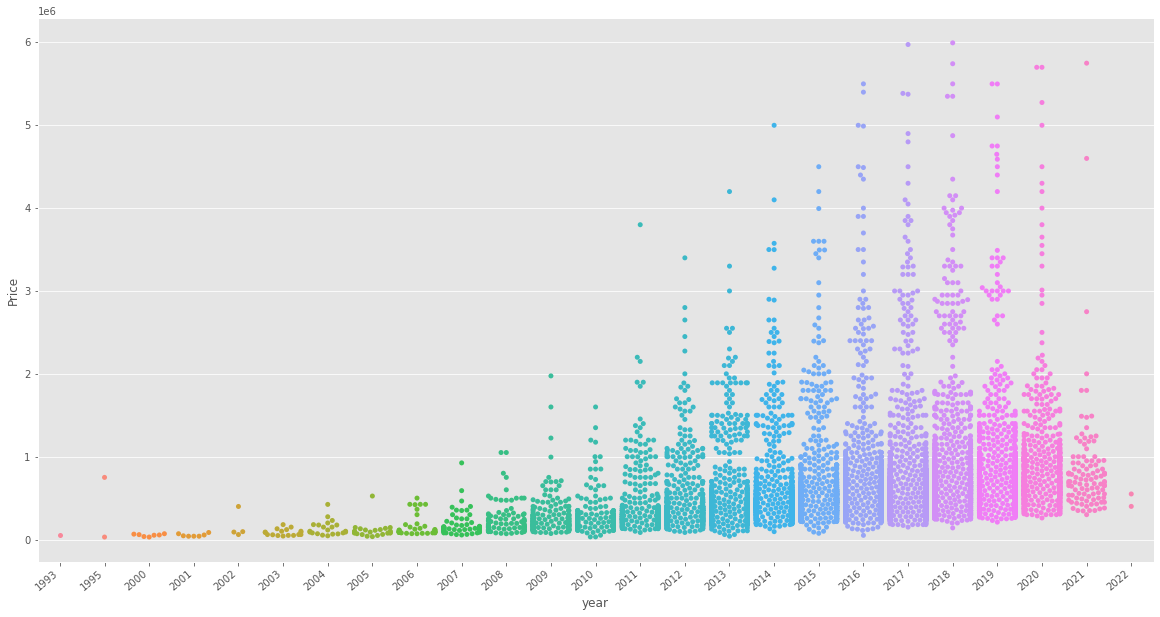

In [35]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

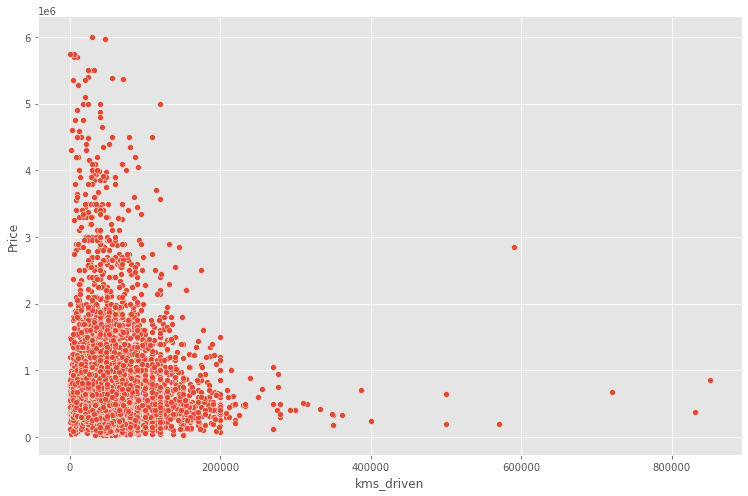

In [36]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

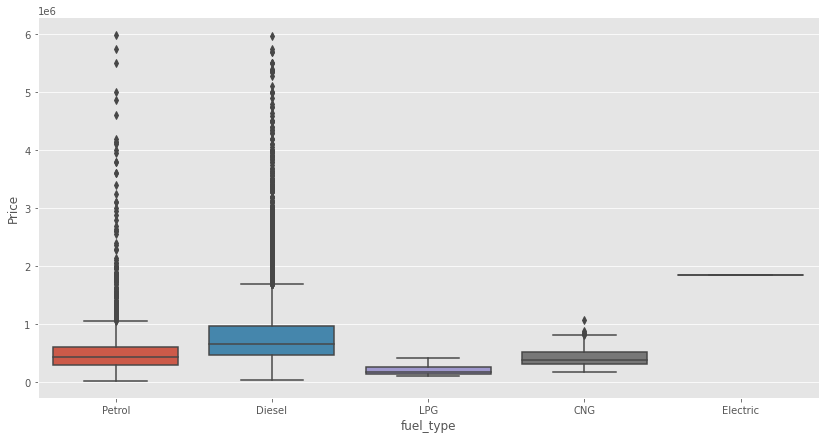

In [37]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

### Relationship of Price with FuelType, Year and Company mixed

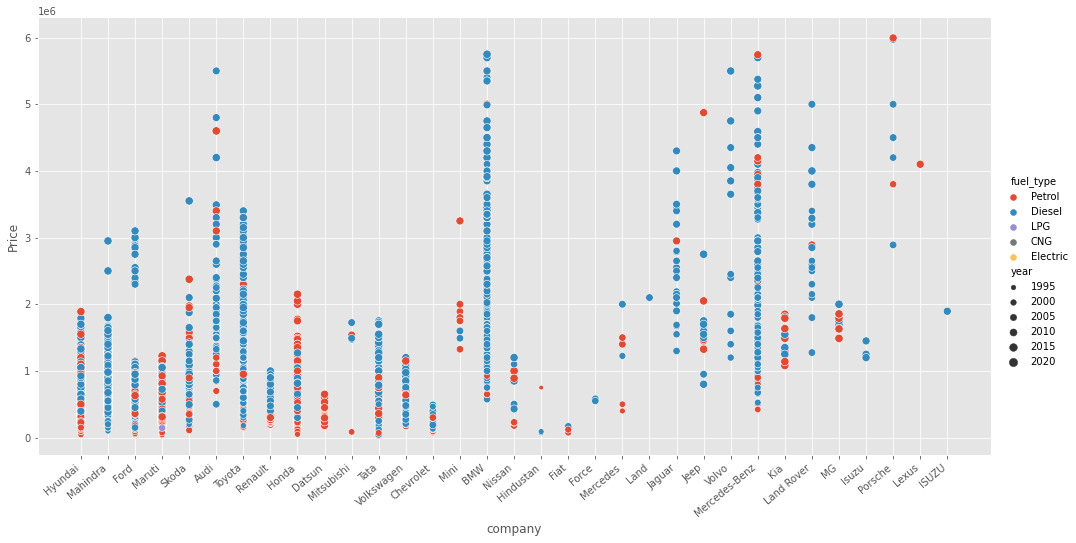

In [38]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

# Data Pre-processing

### Extracting Training Data

In [38]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [39]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
8713,Datsun GO,Datsun,2018,15000,Petrol
8714,Volkswagen Vento,Volkswagen,2015,71000,Diesel
8715,Toyota Fortuner,Toyota,2011,140000,Diesel
8716,Renault Duster,Renault,2015,34000,Diesel


In [40]:
y.shape

(8507,)

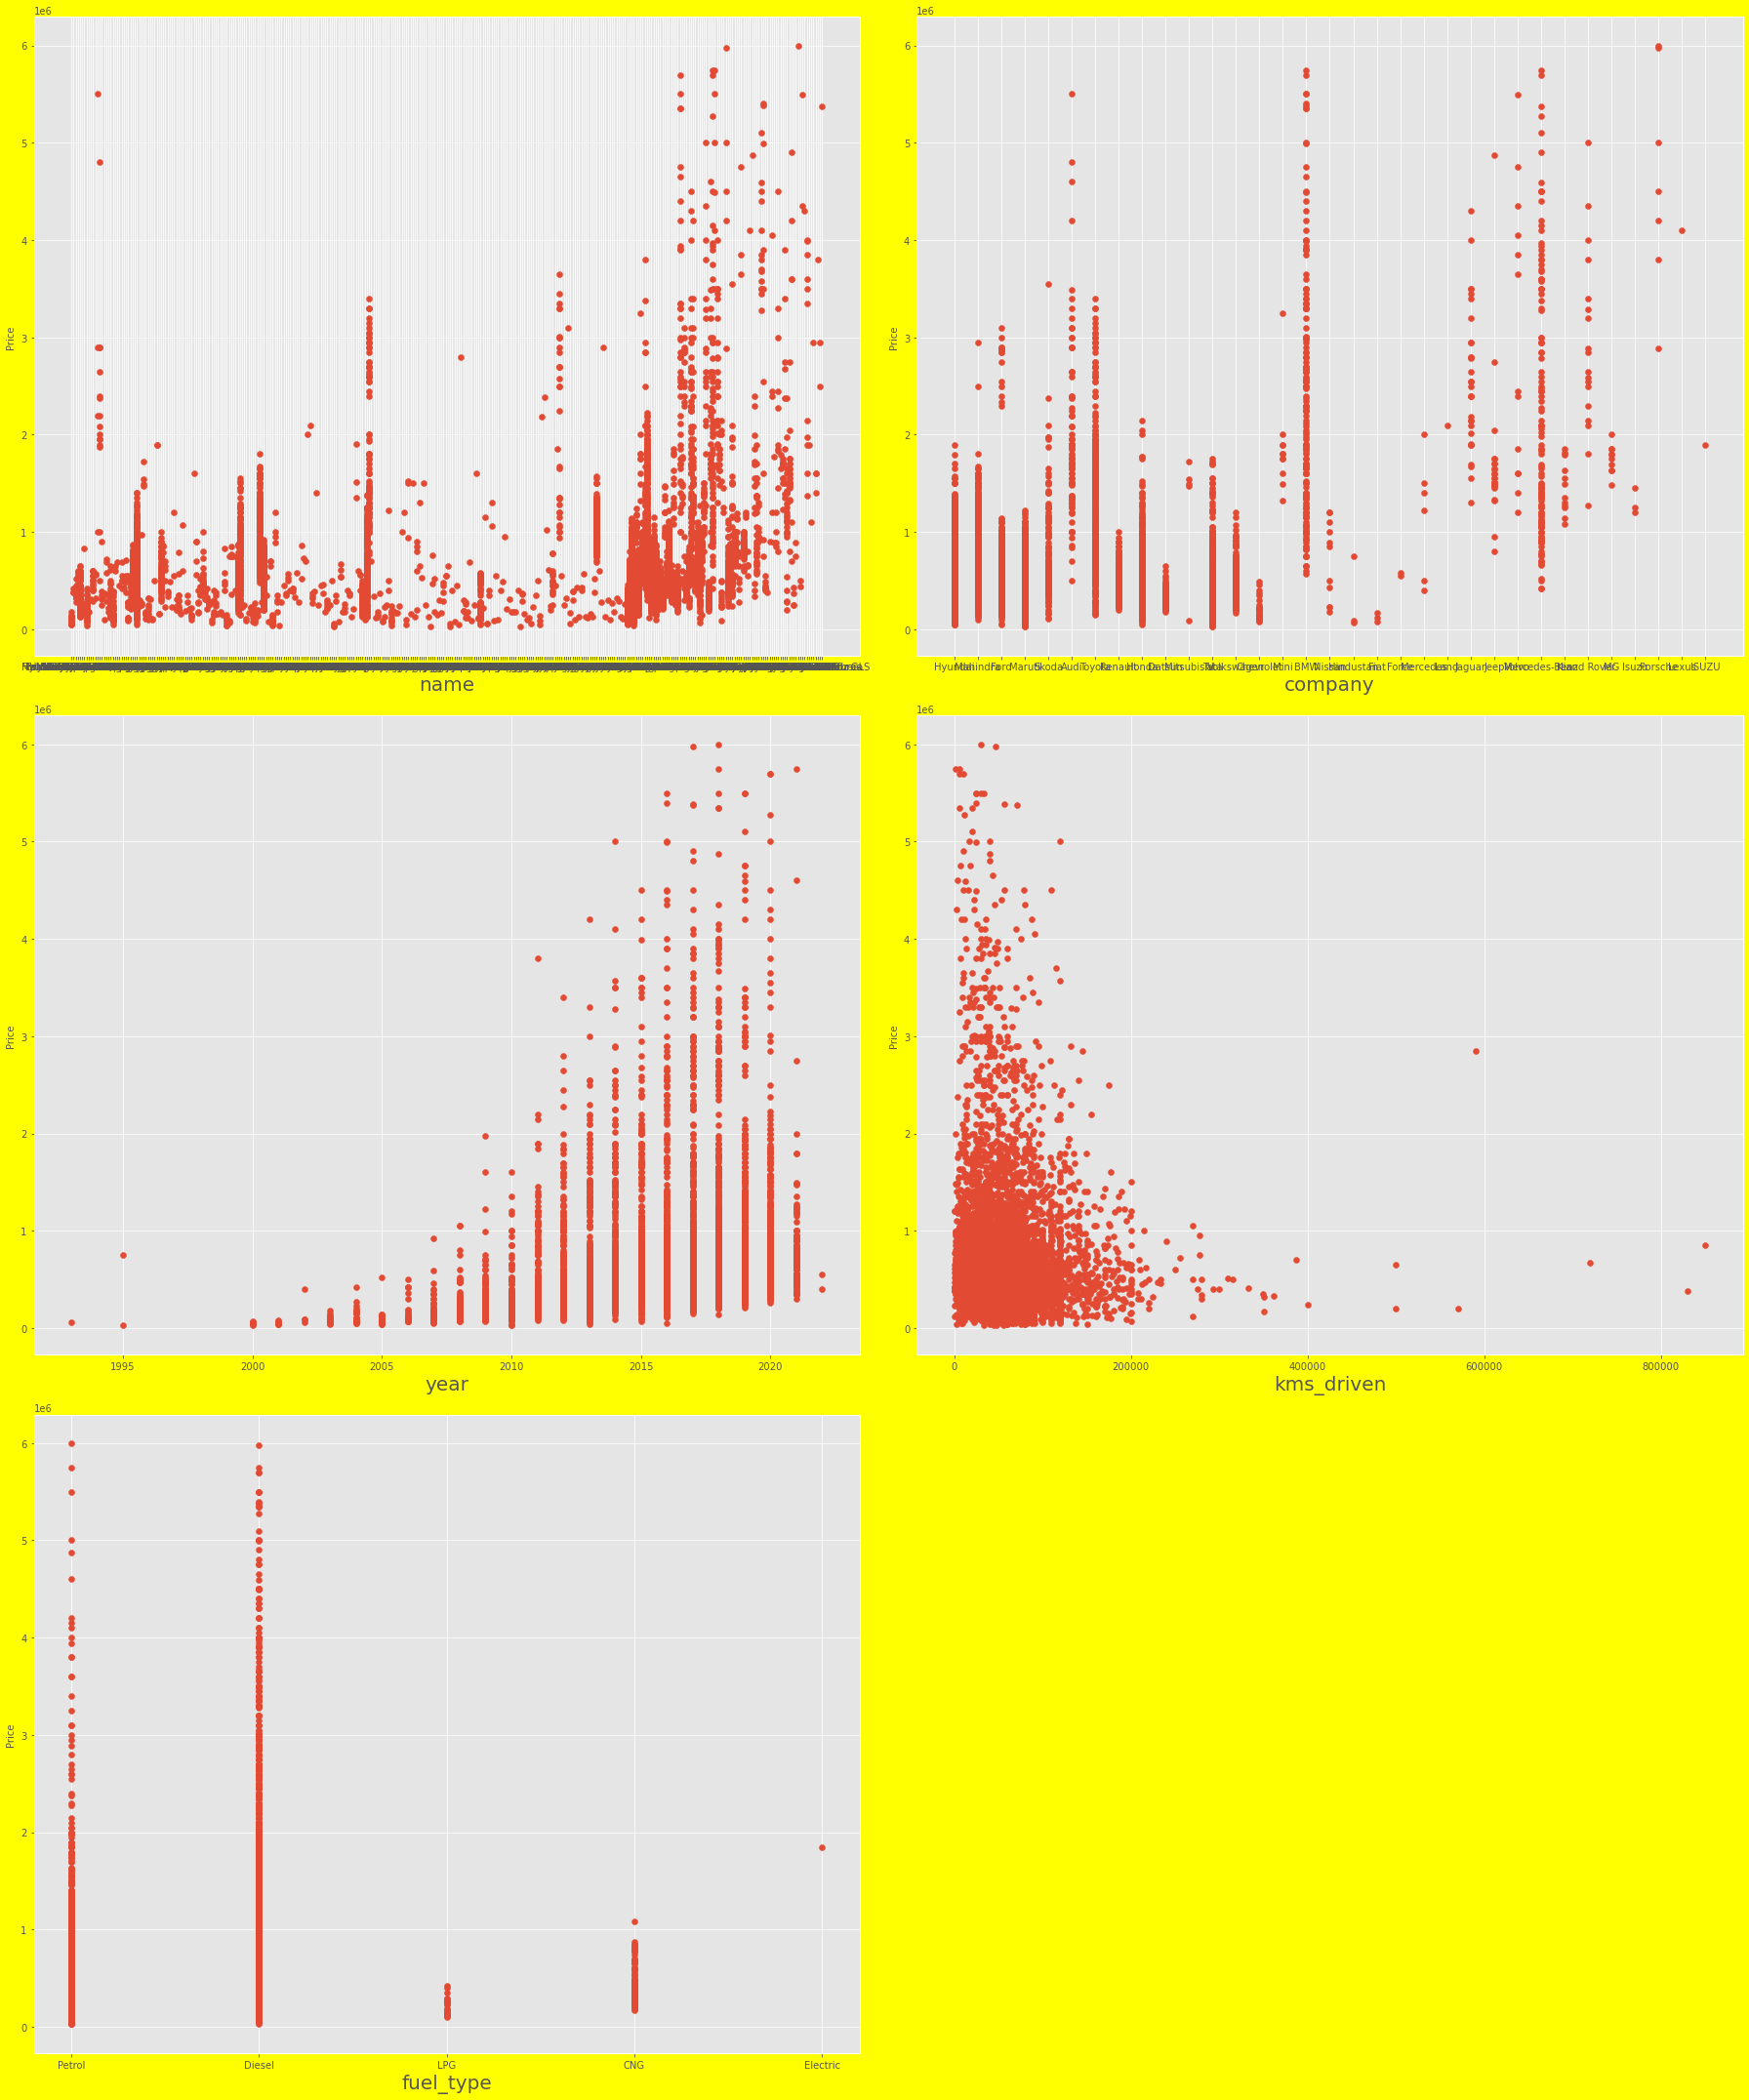

In [41]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship
import matplotlib.pyplot as plt
plt.figure(figsize =(25,30), facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Price ',fontsize = 10)
    plotnumber +=1
plt.tight_layout()


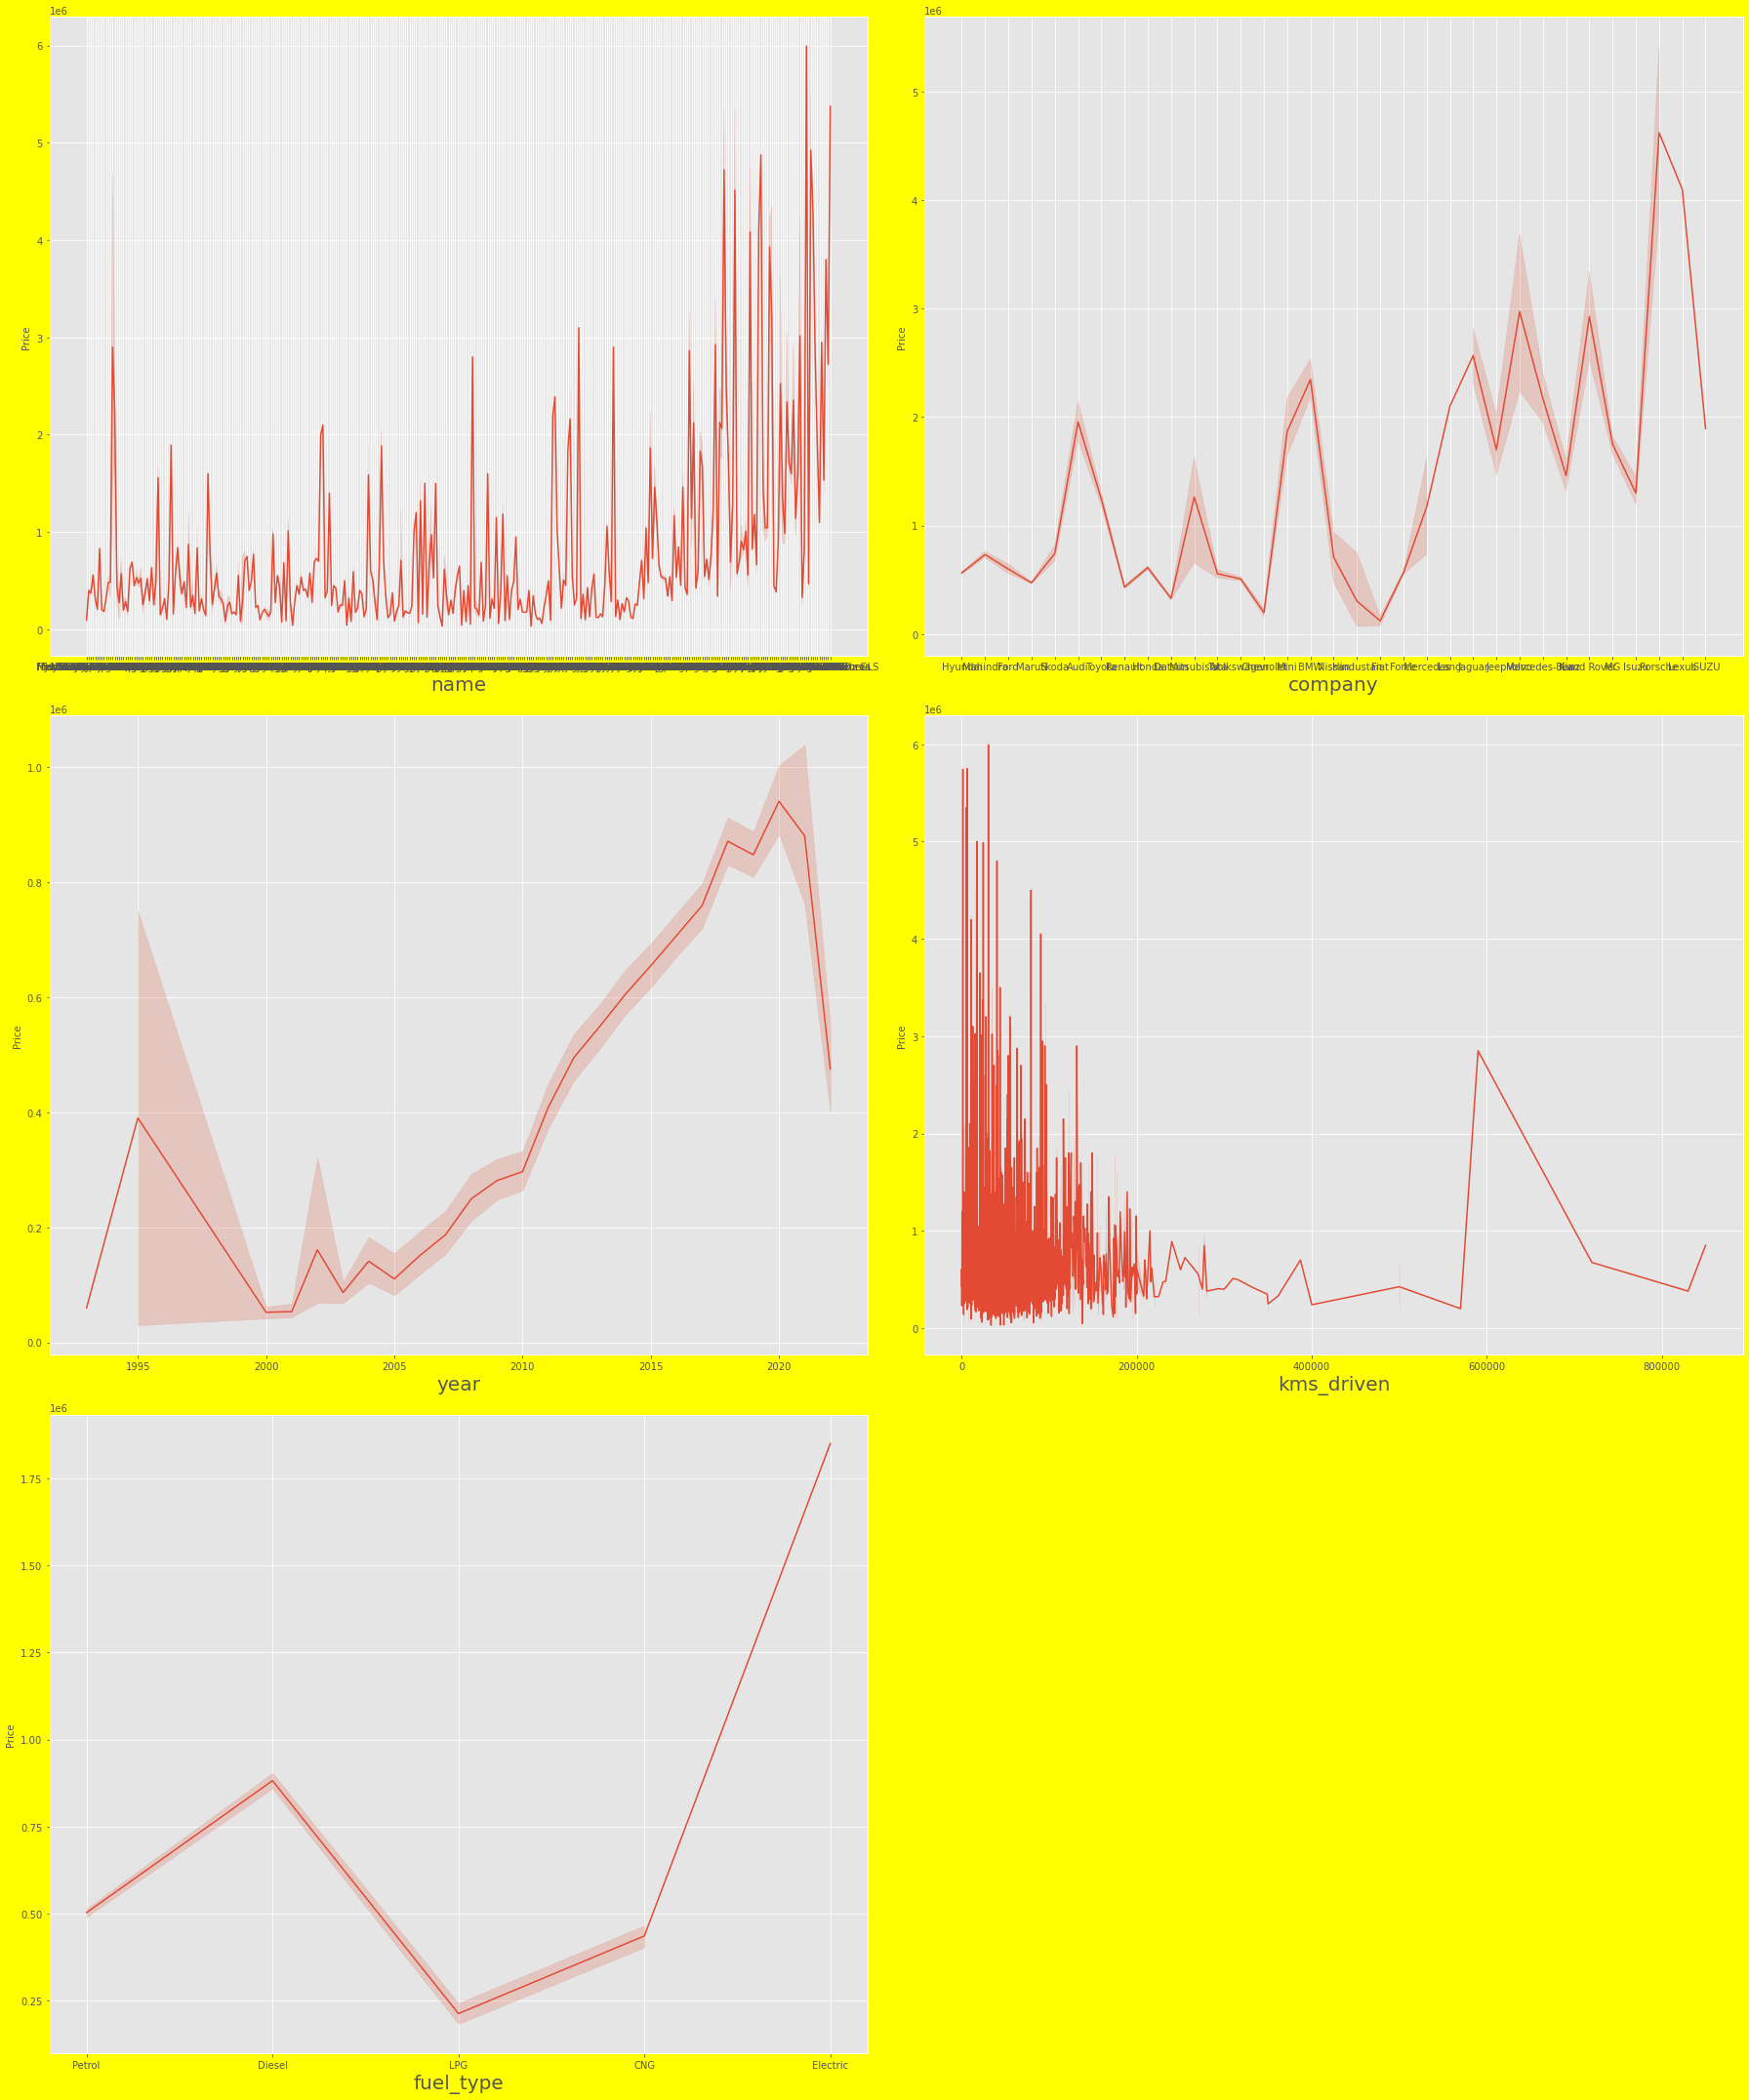

In [42]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship
import matplotlib.pyplot as plt
plt.figure(figsize =(25,30), facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.lineplot(X[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Price ',fontsize = 10)
    plotnumber +=1
plt.tight_layout()


#### Creating an OneHotEncoder object to contain all the possible categories

In [156]:
car1 = pd.get_dummies(car[['name','company','fuel_type']], drop_first= True)

car1

,name_Audi A4,name_Audi A4 1.8,name_Audi A4 2.0,name_Audi A6,name_Audi A6 2.0,name_Audi A8,name_Audi Q3 2.0,name_Audi Q5 2.0,name_Audi Q7,name_BMW 3,...,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
8715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8716,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [157]:
car.drop(columns=['name','company','fuel_type'],inplace=True)
car

,year,Price,kms_driven
0,2007,80000,45000
1,2006,425000,40
2,2014,325000,28000
3,2014,575000,36000
4,2012,175000,41000
...,...,...,...
8713,2018,295000,15000
8714,2015,480000,71000
8715,2011,1200000,140000
8716,2015,475000,34000


In [158]:
car = pd.concat([car,car1],axis=1)

In [159]:
car

,year,Price,kms_driven,name_Audi A4,name_Audi A4 1.8,name_Audi A4 2.0,name_Audi A6,name_Audi A6 2.0,name_Audi A8,name_Audi Q3 2.0,...,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol
0,2007,80000,45000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,425000,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2014,325000,28000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2014,575000,36000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2012,175000,41000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8713,2018,295000,15000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8714,2015,480000,71000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
8715,2011,1200000,140000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8716,2015,475000,34000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [45]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [51]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in car.columns:
    if car[i].dtypes == "object":
        car[i]=enc.fit_transform(car[i].values.reshape(-1,1))


In [52]:
car

,name,company,year,Price,kms_driven,fuel_type
0,114,9,2007,80000,45000,4
1,156,19,2006,425000,40,1
2,111,9,2014,325000,28000,4
3,52,6,2014,575000,36000,1
4,59,6,2012,175000,41000,1
...,...,...,...,...,...,...
8713,38,3,2018,295000,15000,4
8714,335,31,2015,480000,71000,1
8715,319,30,2011,1200000,140000,1
8716,251,27,2015,475000,34000,1


#### we have converted the categorical columns to numnerical columns with the labe Encoder 

# Correlation of the columns with the Price as in Label

In [53]:
car.corr()['Price'].sort_values()

fuel_type    -0.288637
kms_driven   -0.070029
name         -0.069754
company      -0.063714
year          0.298133
Price         1.000000
Name: Price, dtype: float64

<AxesSubplot:>

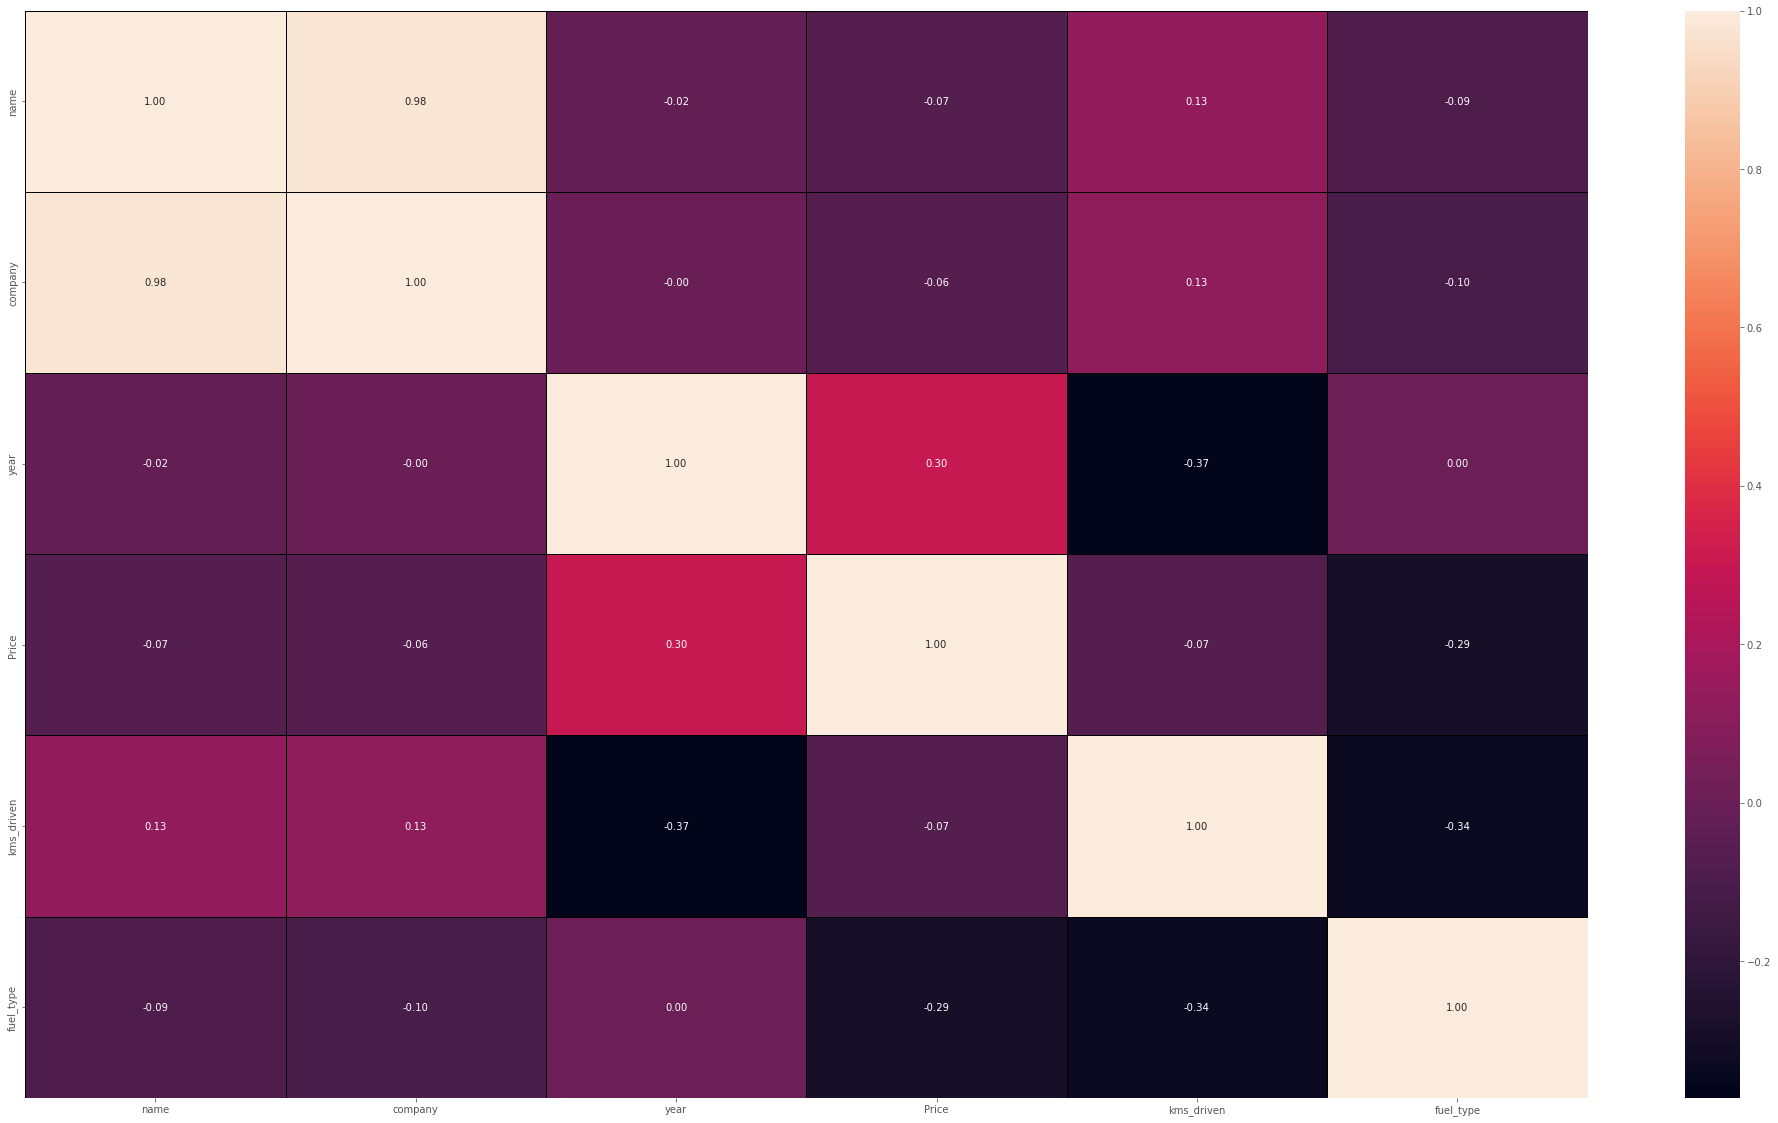

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
#size of canvas
plt.figure(figsize=(35,20))
sns.heatmap(car.corr(),annot=True, linewidths=0.5,linecolor='black', fmt='.2f')

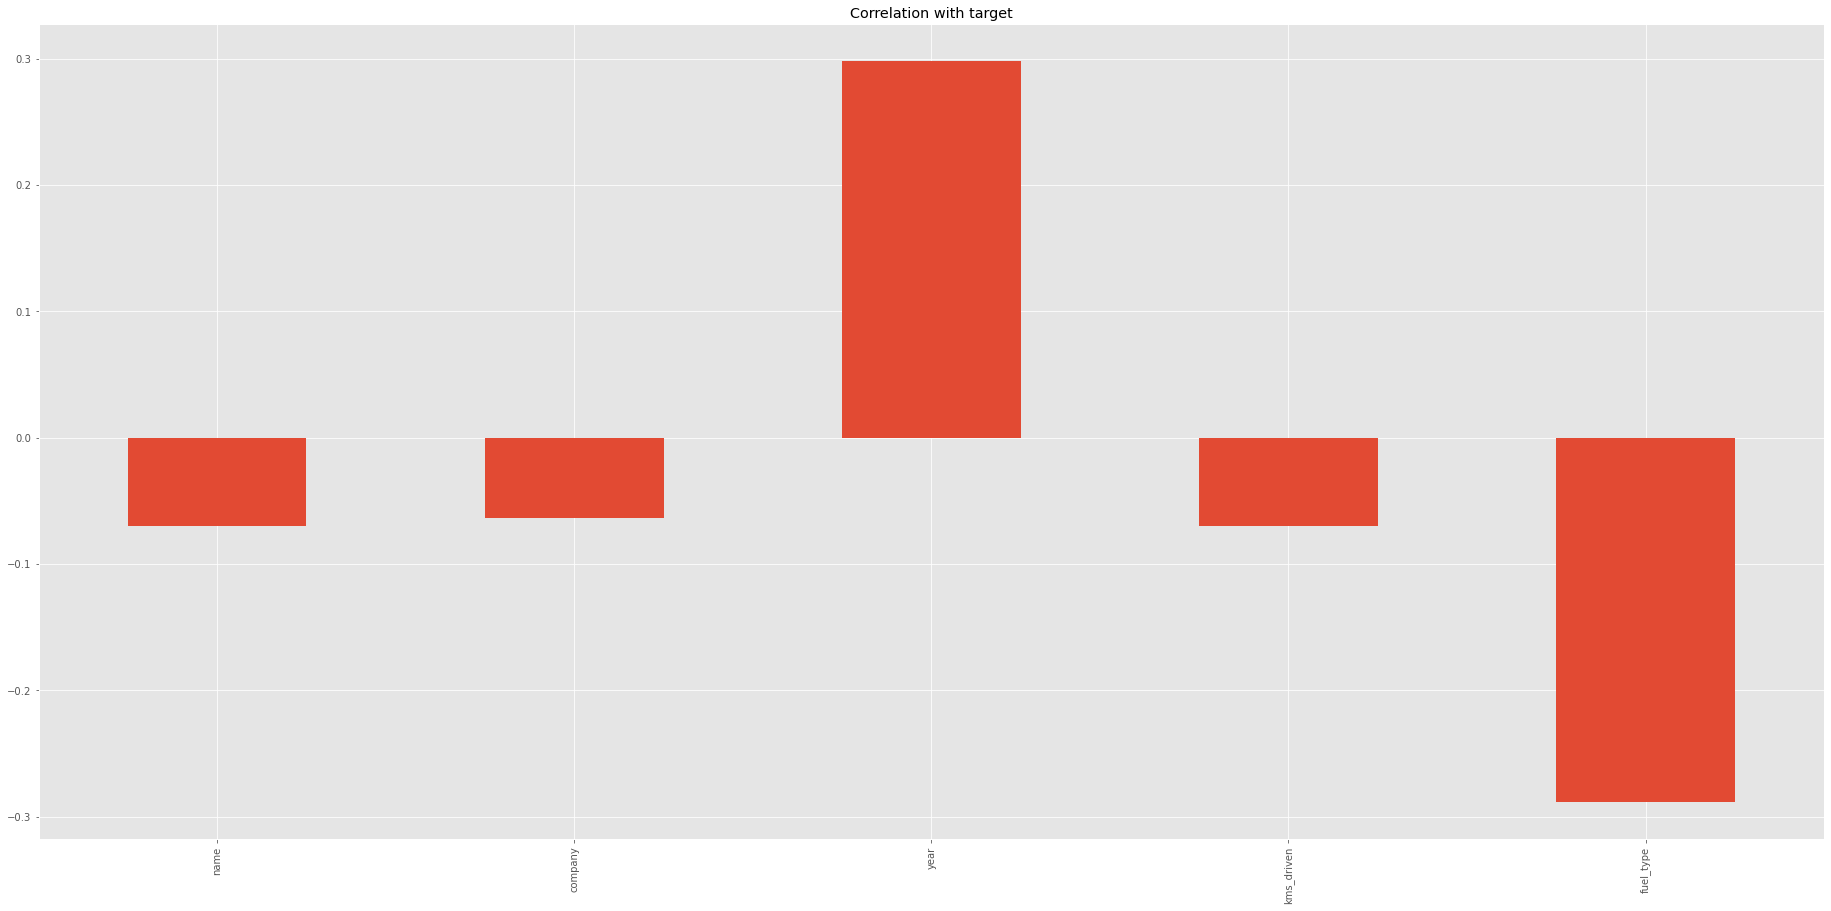

In [55]:
# Plotting a barplot to see the relationship with  label in a better way

car.drop('Price', axis=1).corrwith(car['Price']).plot(kind='bar', grid=True,figsize=(32,15),
                                                  title='Correlation with target')

plt.show()

# Using SelectKBest Feature Selection Method - Target - Average Cost for two

Select KBest use f_classif function to find the best features, where f_classif uses Anova Test

In [160]:
# Again we Divide data into features and label

X = car.drop(columns = ['Price'])
y = car['Price']

In [58]:
from sklearn.feature_selection import SelectKBest, f_classif

In [59]:
best_features = SelectKBest(score_func = f_classif, k=5)

fit = best_features.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(X.columns)


#concatenate dataframes

feature_scores = pd.concat([df_columns, df_scores], axis = 1)

feature_scores.columns = ['Feature_name', 'Score']   #name output columns

print(feature_scores.nlargest(5,'Score'))  #Print Best features

  Feature_name     Score
4    fuel_type  2.484847
0         name  1.360954
1      company  1.324382
3   kms_driven  0.926324
2         year -2.589921


# Variance Inflation Factor

Checking for Multicollinearity problem to see if one feature is dependent on the other , we need to scale the dat first using MINMAX Scalar

In [161]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [162]:
X_scaled = mms.fit_transform(X)

In [163]:
X_scaled.shape

(8507, 381)

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#chck Values
vif

,vif,Features
0,114.015727,name
1,107.424376,company
2,8.444488,year
3,2.710697,kms_driven
4,3.611373,fuel_type


### as name , year &  company are categorical columns converted we cant do any treatment of it 

# Principal Component Analysis (PCA)

It is a dimension reduction technique and not a feature selection one.

and we are going to apply on the features only , it is mainly used if there are too many features and no correlation with the target

but its the final analysis we are going to do to chcek for multicollinearity problem

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA()

In [66]:
pca.fit_transform(X_scaled) #To scale the data with PCA so we can plot the graph to see whats the coverage 

array([[-0.48066081,  0.08570943,  0.29594424, -0.04421685, -0.02560821],
       [ 0.32606245,  0.15915526,  0.30837809, -0.14374585,  0.08787978],
       [-0.48502655,  0.09151155,  0.05478666, -0.0211827 , -0.02516441],
       ...,
       [ 0.60014885, -0.34877452,  0.16759793,  0.04762652, -0.01831544],
       [ 0.49982282, -0.16872633,  0.00875403, -0.05216662,  0.05236852],
       [ 0.16300157,  0.46982009, -0.12076373, -0.01472265, -0.00165192]])

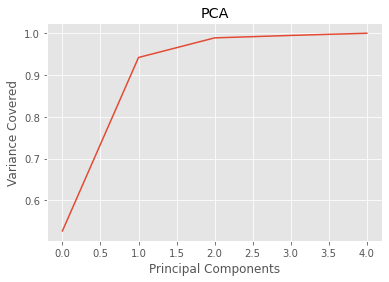

In [67]:
# lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

### we see that we only need 2 features to cover the entire dataset to be able to predict the price 

# Linear Regression

In [133]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [164]:
scores_test=[]
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = i)
    lr.fit(X_train,y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :-{r2_score(y_test,pred_test)}")
    print('\n')
    scores_test.append(r2_score(y_test,pred_test))

At random state 0,the training accuracy is :-0.8379540370249199
At random state 0,the testing accuracy is :--137965866056.44028


At random state 1,the training accuracy is :-0.8306129506922586
At random state 1,the testing accuracy is :--64049968806.94777


At random state 2,the training accuracy is :-0.8339508298174233
At random state 2,the testing accuracy is :--172753909508.93176


At random state 3,the training accuracy is :-0.8347479362760775
At random state 3,the testing accuracy is :--62731031654.14668


At random state 4,the training accuracy is :-0.8431849589675156
At random state 4,the testing accuracy is :--254849001588.58914


At random state 5,the training accuracy is :-0.8334257976874375
At random state 5,the testing accuracy is :-0.7974722041250379


At random state 6,the training accuracy is :-0.8367148792239008
At random state 6,the testing accuracy is :--13026806104.855461


At random state 7,the training accuracy is :-0.8508075609193941
At random state 7,the testing

At random state 64,the training accuracy is :-0.8354650316501162
At random state 64,the testing accuracy is :--17996953870.33405


At random state 65,the training accuracy is :-0.8342484224177925
At random state 65,the testing accuracy is :--25089547985.945904


At random state 66,the training accuracy is :-0.8320250820323376
At random state 66,the testing accuracy is :--118560995290.47844


At random state 67,the training accuracy is :-0.8419085741833703
At random state 67,the testing accuracy is :--115171957455.30309


At random state 68,the training accuracy is :-0.8411260705434949
At random state 68,the testing accuracy is :--86956276476.69987


At random state 69,the training accuracy is :-0.8317541240042361
At random state 69,the testing accuracy is :--1548103480120.835


At random state 70,the training accuracy is :-0.8270483226635028
At random state 70,the testing accuracy is :--44649330471.72775


At random state 71,the training accuracy is :-0.8335357399350685
At random state

# We see the following states giving desirable scores

- At random state 86,the training accuracy is :-0.8751759620343398
- At random state 86,the testing accuracy is :-0.7872334530832948

- At random state 84,the training accuracy is :-0.8365708488486432
- At random state 84,the testing accuracy is :-0.8009693192582444

- At random state 86,the training accuracy is :-0.8319015551760935
- At random state 86,the testing accuracy is :-0.8108931549841014

Best score as per the analysis for Linear regression is at state 86 

At random state 86,the training accuracy is :-0.8319015551760935

At random state 86,the testing accuracy is :-0.8108931549841014

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 86)

In [170]:
lr.fit(X_train,y_train)

LinearRegression()

In [171]:
pred_test=lr.predict(X_test)

In [172]:
print(r2_score(y_test,pred_test))

0.8108931549841014


# Cross-Validation of the model

In [173]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and the accuracy for testing is {Test_accuracy}")
    print('\n')

At cross fold2 the cv score is 0.7282091418073493 and accuracy score for training is -0.838294735269473and the accuracy for testing is 0.8108931549841014


At cross fold3 the cv score is -4507804928.444499 and accuracy score for training is -0.838294735269473and the accuracy for testing is 0.8108931549841014


At cross fold4 the cv score is -8035892193.307001 and accuracy score for training is -0.838294735269473and the accuracy for testing is 0.8108931549841014


At cross fold5 the cv score is -13489665139.187572 and accuracy score for training is -0.838294735269473and the accuracy for testing is 0.8108931549841014


At cross fold6 the cv score is -1290808635.8864625 and accuracy score for training is -0.838294735269473and the accuracy for testing is 0.8108931549841014


At cross fold7 the cv score is -3777478034.2262607 and accuracy score for training is -0.838294735269473and the accuracy for testing is 0.8108931549841014


At cross fold8 the cv score is -2983250304.0004287 and accura

We will take this cv 

At cross fold2 the cv score is 0.7282091418073493 and accuracy score for training is -0.838294735269473and the accuracy for testing is 0.8108931549841014

# Plotting the linear Regression graph with actual and predicted values comparison

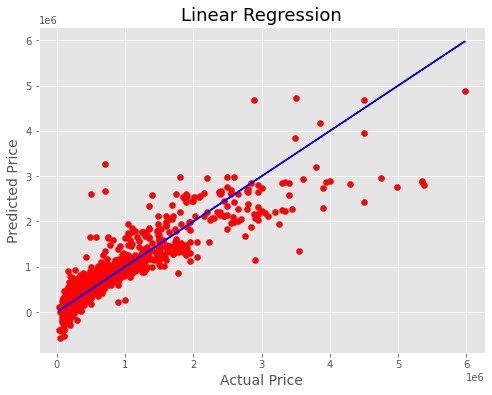

In [175]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization of the Linear Model

In [176]:
from sklearn.model_selection import GridSearchCV #to select the best parameters for hyperparameter tuning
from sklearn.model_selection import cross_val_score #to check the difference from the earlier score without hyper parameter tuning

In [177]:
from sklearn.linear_model import Lasso

parameters ={'alpha' : [.0001, .001, .01, .1, 1, 10],
            'random_state' : list(range(0,15))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(X_train, y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


# Final model training for Linear Regression

In [179]:
ls = Lasso(alpha= 10, random_state= 0)
ls.fit(X_train,y_train)
ls_score_training = ls.score(X_train,y_train)
pred_ls = ls.predict(X_test)
ls_score_training*100

83.05976298557103

### we have increased the test score from 81 to 83

# Checking MSE,RMSE score 

In [180]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

MAE: 148333.37078024718
MSE: 75539730869.94919
RMSE: 274844.92149201006


### we see that the MAE,MES,RMSE metrics are really bad with the linearmodel so we will test other models , 

# Decision Tree Regressor

In [184]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
pred_test =dt.predict(X_test)
dfs = r2_score(y_test,pred_test)
print('R2 Score :',dfs*100)

dfscore = cross_val_score(dt,X,y,cv=2)
dfc =dfscore.mean()
print('Cross Val Score :',dfc*100)


R2 Score : 78.40260096204126
Cross Val Score : 77.41114311167591


In [182]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

MAE: 129586.6152640652
MSE: 81157278977.29672
RMSE: 284881.1664138167


# K- Nearest Neighbors

In [187]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
pred_test =knn.predict(X_test)
knns = r2_score(y_test,pred_test)
print('R2 Score :',knns*100)

knnscore = cross_val_score(knn,X,y,cv=9)
knnc =knnscore.mean()
print('Cross Val Score :',knnc*100)


R2 Score : 12.576183453079615
Cross Val Score : 8.285522657608881


In [186]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

MAE: 334889.42632816173
MSE: 349219065709.809
RMSE: 590947.5998003621


# Bagging Classifier

In [188]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor


knn = BaggingRegressor(KNeighborsRegressor(n_neighbors=5),
                           n_estimators=9, max_samples= 0.7,
                           bootstrap=True, random_state=3, oob_score = True)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
pred_test =knn.predict(X_test)
knns = r2_score(y_test,pred_test)
print('R2 Score :',knns*100)

knnscore = cross_val_score(knn,X,y,cv=2)
knnc =knnscore.mean()
print('Cross Val Score :',knnc*100)


R2 Score : 15.212416353264436
Cross Val Score : 7.541548235357343


# Random Forest Regressor

In [189]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred_decision =rf.predict(X_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score :',rfs*100)

rfscore = cross_val_score(rf,X,y,cv=2)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)


R2 Score : 85.84608793733629
Cross Val Score : 81.54113096431075


In [190]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

MAE: 329994.1063678629
MSE: 338688493758.6073
RMSE: 581969.4955567751


# ADA Boost Regressor

In [194]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

ada.fit(X_train,y_train)
ada.score(X_train,y_train)
pred_decision =ada.predict(X_test)

adas = r2_score(y_test,pred_decision)
print('R2 Score :',adas*100)

adascore = cross_val_score(ada,X,y,cv=2)
adac =adascore.mean()
print('Cross Val Score :',adac*100)


R2 Score : 25.975884950280413
Cross Val Score : 13.4872928546307


In [192]:
#Checking MAE MSE and RMSE scores
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_decision))
print('MSE:', metrics.mean_squared_error(y_test, pred_decision))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_decision)))

MAE: 369502.91990453145
MSE: 235793613234.91763
RMSE: 485585.84538155317


# Xgboost Regressor

In [199]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

xgb.fit(X_train,y_train)
xgb.score(X_train,y_train)
pred_decision =xgb.predict(X_test)

xgbs = r2_score(y_test,pred_decision)
print('R2 Score :',xgbs*100)

xgbscore = cross_val_score(xgb,X,y,cv=6)
xgbc =xgbscore.mean()
print('Cross Val Score :',xgbc*100)

R2 Score : 90.31281272911396
Cross Val Score : 86.1626219951046


In [196]:
#Checking MAE MSE and RMSE scores
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_decision))
print('MSE:', metrics.mean_squared_error(y_test, pred_decision))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_decision)))

MAE: 105414.22778699092
MSE: 38695982647.693596
RMSE: 196712.94478933915


# we choose XG boost as the best model as it r2 score is the highest and had the fastest computational time as well 

# Hyper parameter Tuning with XG Boost Regressor  

In [197]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
xgb = xgb.XGBRegressor()

#Creating parameters to pass in RandomizedSearchCV

parameters = {'gamma': [0.1,0.5,1,10,16,32,64],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.3, 0.2],
              'max_depth': [5,6,7,8,9,10],
              'n_estimators': [80,100,120,130,150,200],
              'reg_alpha': [0.1,0.5,1,10,16,32,64],
              'reg_lambda': [0.1,0.5,1,10,16,32,64]
             }

RCV = RandomizedSearchCV(xgb,parameters,verbose=2,cv=2, n_jobs = -1)
RCV.fit(X_train,y_train) #fitting data into the model
RCV.best_params_ #printing the best parameters found by the RandomizedSearchCV

Fitting 2 folds for each of 10 candidates, totalling 20 fits


{'reg_lambda': 1,
 'reg_alpha': 32,
 'n_estimators': 150,
 'max_depth': 8,
 'learning_rate': 0.2,
 'gamma': 10}

In [198]:
import xgboost as xgb
xgb = xgb.XGBRegressor(reg_lambda= 1,reg_alpha= 32,n_estimators= 150,max_depth= 8,learning_rate= 0.2,gamma= 10)

xgb.fit(X_train,y_train)
xgb.score(X_train,y_train)
pred_decision =xgb.predict(X_test)

xgbs = r2_score(y_test,pred_decision)
print('R2 Score :',xgbs*100)

xgbscore = cross_val_score(xgb,X,y,cv=6)
xgbc =xgbscore.mean()
print('Cross Val Score :',xgbc*100)



R2 Score : 89.8543840531255
Cross Val Score : 86.74015726630365


#### Since we are getting a lower score we will use the older models score itself 

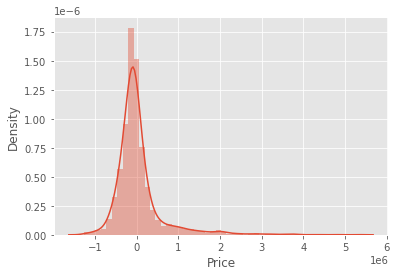

In [200]:
#Plotting distplot to show equillibrium 

sns.distplot(y_test-pred_test)
plt.show()

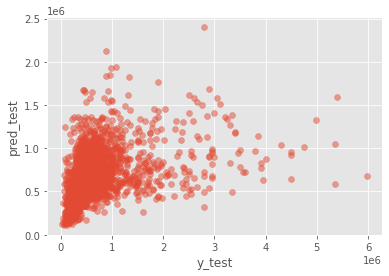

In [201]:
plt.scatter(y_test, pred_test, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("pred_test")
plt.show()

In [202]:
import pickle
filename = 'used_carprice.pkl'
pickle.dump(xgb,open(filename,'wb'))

# Conclusion

In [203]:
loaded_model = pickle.load(open('used_carprice.pkl','rb'))
result = loaded_model.score(X_test,y_test)
print(result*100)

90.31281272911396


In [204]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=['Predicted','Orignal'])

In [205]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126
Predicted,304980.03125,366227.25,210084.875,1393749.375,770231.625,661315.4375,1648171.125,927616.625,293935.46875,331395.9375,...,389342.15625,406409.875,382965.90625,507422.875,337992.84375,395306.875,444060.0,1798362.5,1062226.125,252654.78125
Orignal,304980.03125,366227.25,210084.875,1393749.375,770231.625,661315.4375,1648171.125,927616.625,293935.46875,331395.9375,...,389342.15625,406409.875,382965.90625,507422.875,337992.84375,395306.875,444060.0,1798362.5,1062226.125,252654.78125
